<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

__Inicialización__

In [1]:
from math import factorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
# Cargar el dataset
games = pd.read_csv("/datasets/games.csv")

In [3]:
# Descripción de los datos 
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


__Procesamiento de datos__

In [4]:
# Revisa si hay información duplicada
games.duplicated().sum()

0

In [5]:
# Bucle que itera sobre los encabezados y los pone todos en minúsculas
new_columns = []

for old_name in games.columns:
    name_lowered = old_name.lower()
    new_columns.append(name_lowered)
    
games.columns = new_columns

print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
# Conversiones de tipo de datos necesarias
games["year_of_release"] = pd.to_numeric(games["year_of_release"], errors="coerce").astype("Int64")
games["user_score"] = pd.to_numeric(games["user_score"], errors="coerce").astype("float64")

for col in ["rating", "platform", "genre"]:
    games[col] = games[col].astype("category")
    
games.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(3), float64(6), object(1)
memory usage: 1.1+ MB


_Columnas cambiadas y justificación_
    
* year_of_release: float64 → Int64 (entero “nullable”)
El año es una variable discreta; con Int64 podemos agrupar por año y mantener NaN si hay años desconocidos sin perder filas.

* user_score: object (mezcla de números y “TBD”) → float64
Se necesita un numérico para estadísticas y correlaciones.

* rating: object → category
Es una etiqueta ESRB, no un texto libre; como categórica ahorra memoria y acelera agrupaciones por clasificación.

* platform: object → category
Plataforma es una clase (PS4, XOne, etc.). Categórica para groupby/comparativas y menor uso de memoria.

* genre: object → category
Etiqueta (Acción, Deportes, etc.), conviene categórica para análisis por género.

_Manejo de valores ausentes_

In [7]:
#Eliminar filas sin nombre
before = len(games)
games = games.dropna(subset=["name"])

In [8]:
# Convertir cualquier 'TBD' a NaN y asegurar numérico
mask_tbd = games["user_score"].astype("string").str.strip().str.upper().eq("TBD")
print("Registros con 'TBD' en user_score:", int(mask_tbd.sum()))
games.loc[mask_tbd, "user_score"] = pd.NA
games["user_score"] = pd.to_numeric(games["user_score"], errors="coerce")
print("User_score nulos (post):", games["user_score"].isna().sum())

Registros con 'TBD' en user_score: 0
User_score nulos (post): 9123


In [9]:
#Forzar a numérico y dejar NaN donde no se pueda convertir
games["critic_score"] = pd.to_numeric(games["critic_score"], errors="coerce")

In [10]:
# Agrega categoría "Unrated" y rellena los NaN ahí
if "Unrated" not in games["rating"].cat.categories:
    games["rating"] = games["rating"].cat.add_categories(["Unrated"])

# Rellenar nulos con 'Unrated'
n_antes = games["rating"].isna().sum()
games["rating"] = games["rating"].fillna("Unrated")
n_despues = games["rating"].isna().sum()

In [11]:
games_info = games.isna().sum()
print(games_info)

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64


* name → Se eliminaron 2 filas sin nombre.
Sin identificador no se puede trazar/validar el juego y el impacto es mínimo.

* genre → quedó en 0 nulos (las 2 filas con genre nulo coincidían con las de name; se fueron al borrarlas

* platform → 0 nulos, sin cambios.

* year_of_release → lo dejamos en NA (no imputado).
El año es clave para tendencias temporales; imputar “a ojo” puede distorsionar análisis por año. Se filtrará por año válido cuando corresponda.

* Ventas regionales (na_sales, eu_sales, jp_sales, other_sales) → 0 nulos, sin cambios.

* user_score y critic_score
Faltan más del 50% de los datos (≈54.6% y ≈51.3%, respectivamente), por lo que no se imputa y se dejan los valores como NaN; imputar con una media o mediana alteraría sustancialmente el análisis, porque introduciría puntuaciones ficticias que reducen la varianza, distorsionan las correlaciones con las ventas y sesgan las pruebas de hipótesis; además, en user_score muchos faltantes provienen de “TBD” (sin votos suficientes), y reemplazarlos por un valor central crearía una cobertura artificial que no existe en los datos reales.

* rating (ESRB) → Se completaron con la etiqueta categórica Unrated

__Ventas Globales__

In [12]:
# Ventas totales por region
cols_sales = ["na_sales", "eu_sales", "jp_sales", "other_sales"]

# Crear la columna con la suma de ventas regionales (en millones USD)
games["global_sales"] = games[cols_sales].sum(axis=1)

# Verificación rápida
print("Nulos en global_sales:", games["global_sales"].isna().sum())
games[cols_sales + ["global_sales"]].head(3)


Nulos en global_sales: 0


,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,41.36,28.96,3.77,8.45,82.54
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


__Analisis de datos__

,year_of_release,num_games,share_%,cum_%
0,1980,9,0.05,0.05
1,1981,46,0.28,0.33
2,1982,36,0.22,0.55
3,1983,17,0.10,0.65
4,1984,14,0.09,0.74
5,1985,14,0.09,0.83
6,1986,21,0.13,0.96
7,1987,16,0.10,1.06
8,1988,15,0.09,1.15
9,1989,17,0.10,1.25


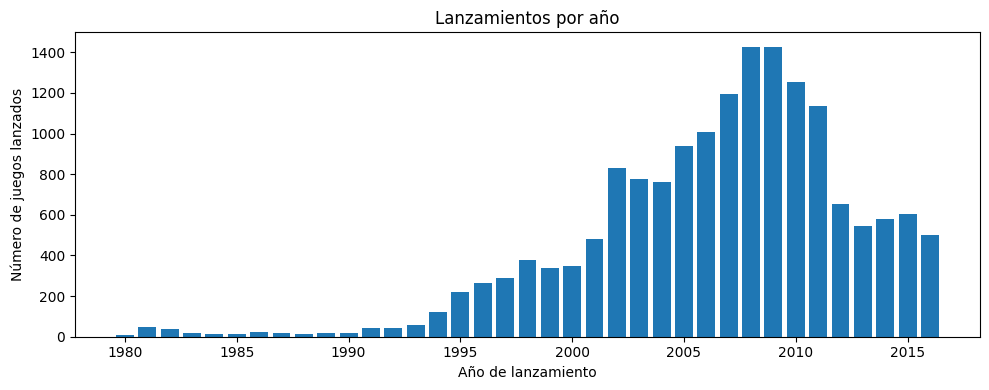

In [13]:
# Lanzamientos por año
year_counts = (
    games.dropna(subset=["year_of_release"]) # excluye años nulos
         .groupby("year_of_release", as_index=False)
         .size()
         .rename(columns={"size": "num_games"})
         .sort_values("year_of_release")
         .reset_index(drop=True)
)

# Porcentaje del total y acumulado
total = int(year_counts["num_games"].sum())
year_counts["share_%"] = (year_counts["num_games"] / total * 100).round(2)
year_counts["cum_%"]   = year_counts["share_%"].cumsum().round(2)

display(year_counts)


# Gráfico
plt.figure(figsize=(10,4))
plt.bar(year_counts["year_of_release"].astype(int), year_counts["num_games"])
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de juegos lanzados")
plt.title("Lanzamientos por año")
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia de los videojuegos con un incremento constante en años anteriores que ha empezado a ir en declive en los últimos años
</div>


,platform,total_global_sales,num_games,share_%
0,PS2,1255.77,2161,14.09
1,X360,971.42,1262,10.90
2,PS3,939.65,1331,10.54
3,Wii,907.51,1320,10.18
4,DS,806.12,2151,9.04
5,PS,730.86,1197,8.20
6,GBA,317.85,822,3.57
7,PS4,314.14,392,3.52
8,PSP,294.05,1209,3.30
9,PC,259.52,974,2.91


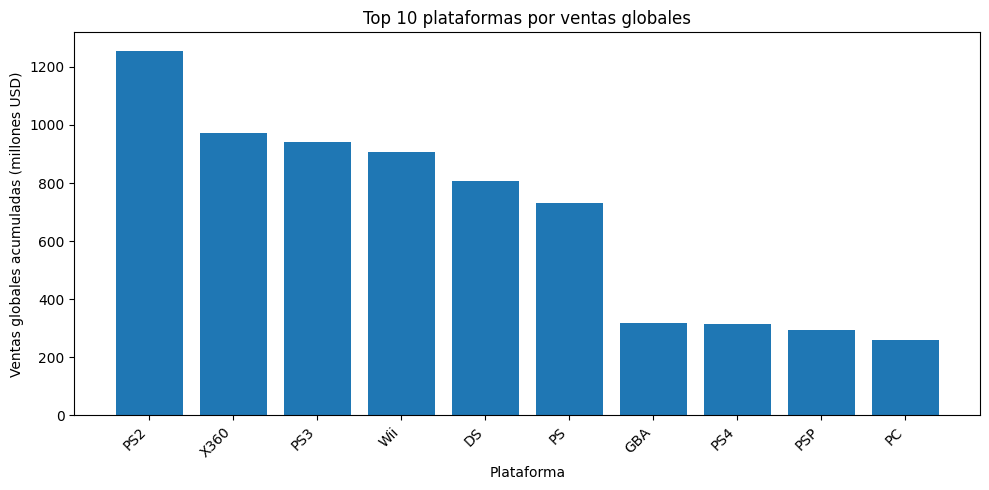

In [15]:
# Ventas por plataforma
platform_totals = (
    games.groupby("platform", as_index=False)
         .agg(total_global_sales=("global_sales","sum"),
              num_games=("name","count"))
         .sort_values("total_global_sales", ascending=False)
         .reset_index(drop=True)
)
platform_totals["share_%"] = (
    platform_totals["total_global_sales"] / platform_totals["total_global_sales"].sum() * 100
).round(2)


display(platform_totals.head(30))

# Gráfico Top 10
import matplotlib.pyplot as plt
top_n = 10
top_tbl = platform_totals.head(top_n)
plt.figure(figsize=(10,5))
plt.bar(top_tbl["platform"], top_tbl["total_global_sales"])
plt.xlabel("Plataforma")
plt.ylabel("Ventas globales acumuladas (millones USD)")
plt.title(f"Top {top_n} plataformas por ventas globales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




,year,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
0,1985,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1988,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1992,0.00,0.00,3.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1994,0.00,0.00,12.87,6.03,0.00,0.00,0.00,0.00,0.00,0.00
4,1995,0.00,0.00,4.22,35.96,0.00,0.00,0.00,0.00,0.00,0.00
5,1996,0.00,0.00,10.58,94.70,0.00,0.00,0.00,0.00,0.00,0.00
6,1997,0.00,0.00,11.27,136.17,0.00,0.00,0.00,0.00,0.00,0.00
7,1998,0.00,0.00,3.26,169.49,0.00,0.00,0.00,0.00,0.00,0.00
8,1999,0.00,0.00,4.74,144.53,0.00,0.00,0.00,0.00,0.00,0.00
9,2000,0.00,0.07,4.66,96.37,39.17,0.00,0.00,0.00,0.00,0.00


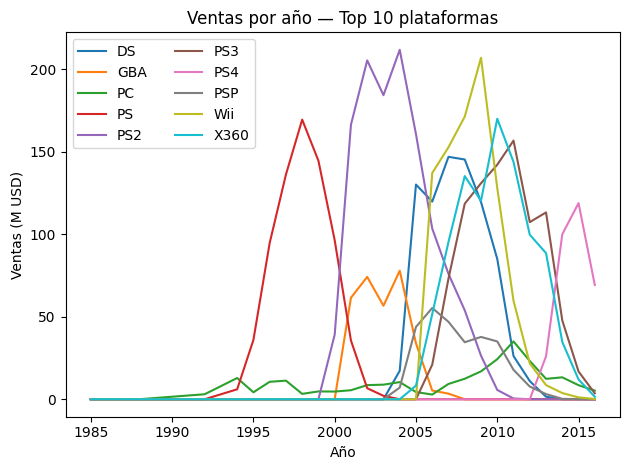

In [16]:
# Top-10 plataformas por ventas totales
top_n = 10
top_platforms = platform_totals.head(top_n)["platform"].tolist()

# Distribución anual de ventas para esas plataformas
tmp = games.dropna(subset=["year_of_release"]).copy()
tmp["platform_str"] = tmp["platform"].astype(str)  # evita problemas con categóricas

dist_top10 = (
    tmp[tmp["platform_str"].isin(top_platforms)]
      .pivot_table(index="year_of_release",
                   columns="platform_str",
                   values="global_sales",
                   aggfunc="sum",
                   fill_value=0.0)    # ventas faltantes = 0.0
      .sort_index()
)

dist_top10_out = dist_top10.copy()
dist_top10_out.columns.name = None
dist_top10_out = dist_top10_out.reset_index().rename(columns={"year_of_release":"year"})
display(dist_top10_out.head(26))

for col in dist_top10.columns:
    plt.plot(dist_top10.index.astype(int), dist_top10[col], label=col)
plt.xlabel("Año"); plt.ylabel("Ventas (M USD)")
plt.title("Ventas por año — Top 10 plataformas")
plt.legend(ncol=2); plt.tight_layout(); plt.show()


In [17]:
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

# Estricto: 2016 == 0 
muertas_2016 = (dist_top10.loc[2016] == 0).loc[lambda s: s].index.tolist()

# Robusto: 0 en los últimos k años (por si 2016 está incompleto)
k = 2  # 2015-2016
ultimos = dist_top10.loc[dist_top10.index >= (2016 - k + 1)]
muertas_k = (ultimos.sum(axis=0) == 0).loc[lambda s: s].index.tolist()

# Reporte (cruza con el Top-10 por ventas totales)
top10 = platform_totals.head(10)["platform"].tolist()
pop_muertas_2016 = [p for p in top10 if p in muertas_2016]
pop_muertas_k    = [p for p in top10 if p in muertas_k]

print("Top-10 sin ventas en 2016:", pop_muertas_2016)
print(f"Top-10 sin ventas en los últimos {k} años:", pop_muertas_k)


thresh = 1.0  # millones

# Asegura índice entero 
dist_top10_idx = dist_top10.copy()
dist_top10_idx.index = dist_top10_idx.index.astype(int)

rows = []
for p in dist_top10_idx.columns:
    s = dist_top10_idx[p]
    active = s[s > thresh]
    if active.empty:
        continue
    first_year = int(active.index.min())
    last_year  = int(active.index.max())
    peak_year  = int(s.idxmax())
    rows.append({
        "platform": p,
        "first_significant_year": first_year,
        "peak_year": peak_year,
        "last_significant_year": last_year,
        "life_span_years": last_year - first_year + 1,
        "ramp_up_years": max(0, peak_year - first_year),
        "decline_years": max(0, last_year - peak_year)
    })

ciclo_top10 = (pd.DataFrame(rows)
               .merge(
                   platform_totals.rename(columns={"global_sales":"total_global_sales"}),
                   on="platform", how="left")
               .sort_values("total_global_sales", ascending=False)
               .reset_index(drop=True))

display(ciclo_top10)

# Resumen generalmente cuánto tardan
ciclo_top10[["life_span_years","ramp_up_years","decline_years"]].median().round(1)

Top-10 sin ventas en 2016: ['PS2', 'DS', 'PS', 'GBA', 'PSP']
Top-10 sin ventas en los últimos 2 años: ['PS2', 'DS', 'PS', 'GBA']


,platform,first_significant_year,peak_year,last_significant_year,life_span_years,ramp_up_years,decline_years,total_global_sales,num_games,share_%
0,PS2,2000,2004,2010,11,4,6,1255.77,2161,14.09
1,X360,2005,2010,2016,12,5,6,971.42,1262,10.90
2,PS3,2006,2011,2016,11,5,5,939.65,1331,10.54
3,Wii,2006,2009,2015,10,3,6,907.51,1320,10.18
4,DS,2004,2007,2013,10,3,6,806.12,2151,9.04
5,PS,1994,1998,2003,10,4,5,730.86,1197,8.20
6,GBA,2001,2004,2007,7,3,3,317.85,822,3.57
7,PS4,2013,2015,2016,4,2,1,314.14,392,3.52
8,PSP,2004,2006,2013,10,2,7,294.05,1209,3.30
9,PC,1992,2011,2016,25,19,5,259.52,974,2.91


life_span_years    10.0
ramp_up_years       3.5
decline_years       5.5
dtype: float64

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Buena manera de mostrar los datos, gracias a la gráfica y tabla podemos observar el tiempo de vida de cada una de las plataformas
</div>


__¿Por qué 2013–2015?__

Criterios usados:

1. 2016 puede estar incompleto (el propio enunciado lo advierte)
2. Para predecir 2017 interesan los patrones recientes. Un marco de 3 años (2013–2015) es lo bastante cercano para capturar el estado del mercado justo antes del año objetivo sin “mezclar” generaciones viejas.
3. Del análisis de lanzamientos por año, los 80s y primeros 90s tienen muy pocos juegos (muchos años <50), por lo que no son representativos. 2013–2015 sí tiene volumen alto y estable.
4. Ciclo de vida de plataformas

In [18]:
# Periodo para 2017, líderes, tendencias y candidatas

# Definir periodo de trabajo (2013–2015) para entrenar/predict 2017
PERIOD_START, PERIOD_END = 2013, 2015
years = list(range(PERIOD_START, PERIOD_END + 1))

games_period = (
    games.dropna(subset=["year_of_release"])
         .query("year_of_release >= @PERIOD_START and year_of_release <= @PERIOD_END")
         .copy()
)

# Líderes por ventas en el periodo
leaders = (
    games_period.groupby("platform", as_index=False)["global_sales"]
                .sum()
                .rename(columns={"global_sales": "total_global_sales"})
                .sort_values("total_global_sales", ascending=False)
                .reset_index(drop=True)
)
leaders["share_pct"] = (leaders["total_global_sales"] /
                        leaders["total_global_sales"].sum() * 100).round(2)

display(leaders)

# Ventas por año dentro del periodo (para medir tendencia)
annual = (
    games_period.groupby(["year_of_release", "platform"], as_index=False)["global_sales"]
                .sum()
                .pivot(index="year_of_release", columns="platform", values="global_sales")
                .reindex(years)                      # garantiza 2013, 2014, 2015 en orden
                .fillna(0.0)
)

# Tendencia por plataforma (pendiente lineal)
rows = []
x = np.array(years, dtype=float)
for p in annual.columns:
    y = annual[p].values.astype(float)
    slope = np.polyfit(x, y, 1)[0]  # millones USD por año
    rows.append({
        "platform": p,
        "sales_2013": annual.loc[2013, p],
        "sales_2014": annual.loc[2014, p],
        "sales_2015": annual.loc[2015, p],
        "delta_2015_2013": annual.loc[2015, p] - annual.loc[2013, p],
        "slope_per_year": slope
    })
trend = pd.DataFrame(rows)
trend["trend"] = np.where(trend["slope_per_year"] > 0, "Growing",
                   np.where(trend["slope_per_year"] < 0, "Declining", "Flat"))

#  Resumen: líderes + tendencia
summary = (leaders.merge(trend, on="platform", how="left")
                 .sort_values("total_global_sales", ascending=False)
                 .reset_index(drop=True))
display(summary)

# Selección de plataformas potencialmente rentables para 2017
#  Criterio: tendencia "Growing" y (cuota >= 5% o ventas 2015 >= 5M USD)
mask = (summary["trend"] == "Growing") & (
        (summary["share_pct"] >= 5) | (summary["sales_2015"] >= 5)
)
candidates = (summary.loc[mask, ["platform", "total_global_sales", "share_pct", "trend",
                                 "sales_2013", "sales_2015", "slope_per_year"]]
                      .sort_values(["share_pct", "sales_2015"], ascending=False)
                      .reset_index(drop=True))

display(candidates)


,platform,total_global_sales,share_pct
0,PS4,244.89,25.49
1,PS3,177.83,18.51
2,X360,135.28,14.08
3,XOne,133.17,13.86
4,3DS,128.11,13.33
5,WiiU,60.03,6.25
6,PC,34.18,3.56
7,PSV,28.74,2.99
8,Wii,13.48,1.40
9,PSP,3.50,0.36


,platform,total_global_sales,share_pct,sales_2013,sales_2014,sales_2015,delta_2015_2013,slope_per_year,trend
0,PS4,244.89,25.49,25.99,100.00,118.90,92.91,46.455,Growing
1,PS3,177.83,18.51,113.25,47.76,16.82,-96.43,-48.215,Declining
2,X360,135.28,14.08,88.58,34.74,11.96,-76.62,-38.310,Declining
3,XOne,133.17,13.86,18.96,54.07,60.14,41.18,20.590,Growing
4,3DS,128.11,13.33,56.57,43.76,27.78,-28.79,-14.395,Declining
5,WiiU,60.03,6.25,21.65,22.03,16.35,-5.30,-2.650,Declining
6,PC,34.18,3.56,12.38,13.28,8.52,-3.86,-1.930,Declining
7,PSV,28.74,2.99,10.59,11.90,6.25,-4.34,-2.170,Declining
8,Wii,13.48,1.40,8.59,3.75,1.14,-7.45,-3.725,Declining
9,PSP,3.50,0.36,3.14,0.24,0.12,-3.02,-1.510,Declining


,platform,total_global_sales,share_pct,trend,sales_2013,sales_2015,slope_per_year
0,PS4,244.89,25.49,Growing,25.99,118.90,46.455
1,XOne,133.17,13.86,Growing,18.96,60.14,20.590


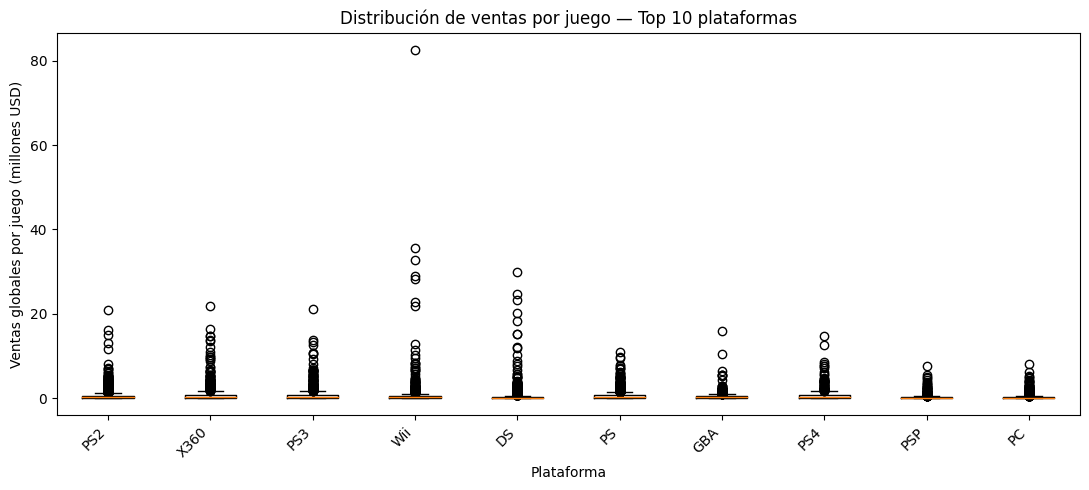

,platform,n,mean,median,std,q1,q3
5,GB,98,2.61,1.16,5.37,0.30,2.16
11,NES,98,2.56,1.38,5.11,1.00,2.22
8,GEN,27,1.05,0.15,1.49,0.07,1.70
23,SNES,239,0.84,0.32,1.87,0.14,0.70
18,PS4,392,0.80,0.20,1.61,0.06,0.73
28,X360,1262,0.77,0.28,1.62,0.11,0.76
0,2600,133,0.73,0.46,0.92,0.30,0.78
17,PS3,1331,0.71,0.27,1.39,0.11,0.75
10,N64,319,0.69,0.27,1.32,0.14,0.60
26,Wii,1320,0.69,0.19,3.13,0.08,0.48


,platform,n,mean,median,std,q1,q3
0,PS2,2161,0.58,0.23,1.14,0.08,0.56
1,X360,1262,0.77,0.28,1.62,0.11,0.76
2,PS3,1331,0.71,0.27,1.39,0.11,0.75
3,Wii,1320,0.69,0.19,3.13,0.08,0.48
4,DS,2151,0.37,0.11,1.43,0.05,0.27
5,PS,1197,0.61,0.26,1.05,0.11,0.66
6,GBA,822,0.39,0.16,0.90,0.05,0.39
7,PS4,392,0.80,0.20,1.61,0.06,0.73
8,PSP,1209,0.24,0.09,0.52,0.03,0.23
9,PC,974,0.27,0.05,0.68,0.02,0.17


In [19]:
# Top 10 plataformas por ventas totales (para legibilidad)
platform_totals = (games.groupby("platform", as_index=False)["global_sales"].sum()
                        .sort_values("global_sales", ascending=False))
top_platforms = platform_totals.head(10)["platform"].tolist()

# Boxplot
data = [games.loc[games["platform"]==p, "global_sales"].values for p in top_platforms]
plt.figure(figsize=(11,5))
plt.boxplot(data, labels=top_platforms, showfliers=True)
plt.xlabel("Plataforma"); plt.ylabel("Ventas globales por juego (millones USD)")
plt.title("Distribución de ventas por juego — Top 10 plataformas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()

# Resumen estadístico
summary = (games.groupby("platform")["global_sales"]
                 .agg(n="count", mean="mean", median="median", std="std",
                      q1=lambda s: s.quantile(0.25), q3=lambda s: s.quantile(0.75))
                 .reset_index().round(2)
                 .sort_values("mean", ascending=False))
display(summary)

# Resumen solo Top 10
summary_top10 = (summary[summary["platform"].isin(top_platforms)]
                 .set_index("platform").loc[top_platforms].reset_index())
display(summary_top10)


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

- Una mejor manera de mostrar los datos es usando `showfliers = False`, de esta manera se remueven los outliers de la gráfica
- Otra manera es utilizando `yscale('log')`, de esta manera el eje Y cambia a uno logaritmico que permite que las cajas se muestren de una mejor manera
</div>


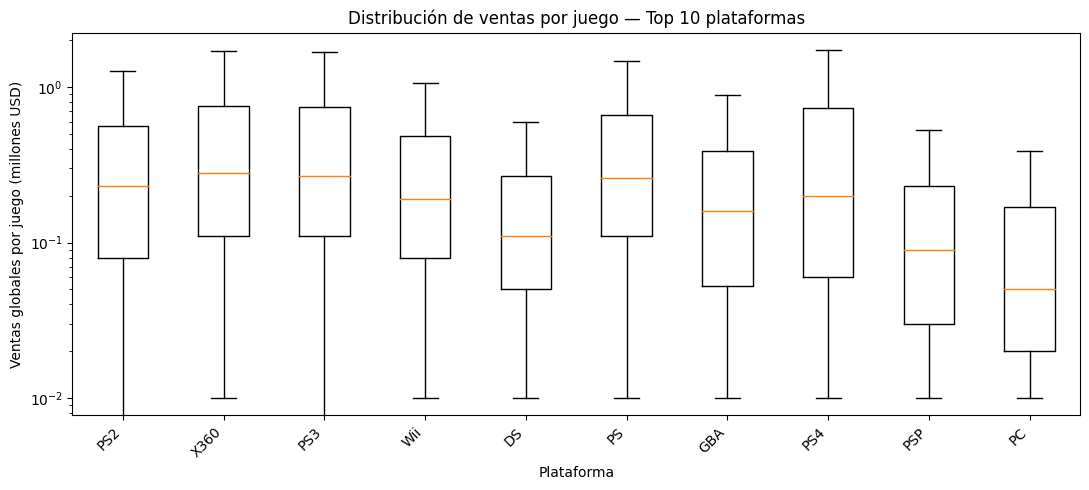

In [21]:
# Boxplot
plt.figure(figsize=(11,5))
plt.boxplot(data, labels=top_platforms, showfliers=False)
plt.xlabel("Plataforma"); plt.ylabel("Ventas globales por juego (millones USD)")
plt.title("Distribución de ventas por juego — Top 10 plataformas")
plt.xticks(rotation=45, ha="right")
plt.yscale('log')
plt.tight_layout(); plt.show()

__¿Son significativas las diferencias?__
Sí, a nivel práctico: los boxplots muestran medianas distintas y rangos intercuartílicos (IQR) muy diferentes entre plataformas. Las de sobremesa con grandes catálogos (PS2, X360, PS3, Wii) tienen distribuciones más altas y más dispersas que portátiles como DS/PSP, cuyas cajas se concentran cerca de cero.

__¿Qué sucede con las ventas promedio en varias plataformas?__
Las distribuciones están muy sesgadas a la derecha: la mayoría de los juegos venden poco y hay pocos “hits” que elevan la media. Por eso la media es mayor que la mediana en todas las plataformas.


* Sobremesa líderes (PS2, X360, PS3, Wii) ⇒ medianas e IQR más altos, y colas con muchos outliers.
* Portátiles (DS/PSP) ⇒ medianas bajas y menos dispersiones altas.
* En todas: media ≫ mediana el promedio está “inflado” por unos pocos superventas; para describir “el juego típico” conviene reportar mediana e IQR y analizar por separado los outliers de alto impacto.

,platform,score_type,n_pairs,pearson_r,pearson_p,spearman_r,spearman_p,pearson_r_log1p_sales,spearman_r_log1p_sales
0,PS4,user_score,257,-0.032,0.6101,-0.028,0.6511,-0.021,-0.029
1,PS4,critic_score,252,0.407,0.0000,0.508,0.0000,0.463,0.508


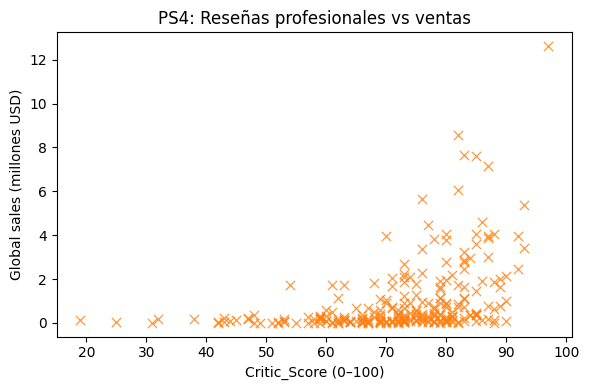

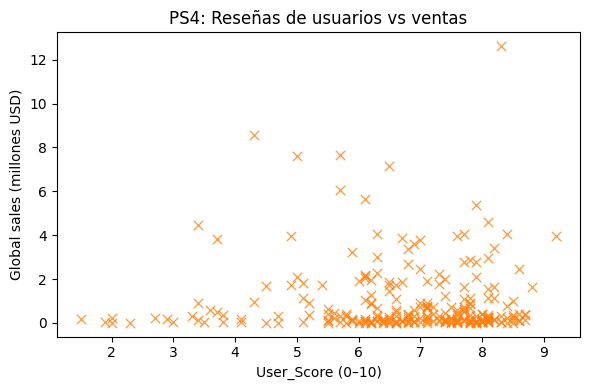

In [22]:
# Reseñas vs ventas en una plataforma popular (PS4)

games["user_score"]   = pd.to_numeric(games["user_score"], errors="coerce")
games["critic_score"] = pd.to_numeric(games["critic_score"], errors="coerce")

# 2) Elegir plataforma popular
PLAT = "PS4"  # cámbiala si quieres analizar otra
dfp = games[(games["platform"] == PLAT) & (games["global_sales"] > 0)].copy()

# 3) Correlaciones (Pearson y Spearman), también con log(ventas)
pairs = {
    "user_score":   dfp[["user_score","global_sales"]].dropna(),
    "critic_score": dfp[["critic_score","global_sales"]].dropna()
}

rows = []
for col, sub in pairs.items():
    x = sub[col].to_numpy(dtype=float)
    y = sub["global_sales"].to_numpy(dtype=float)
    ylog = np.log1p(y)

    # Pearson (solo si hay varianza)
    if x.std() > 0 and y.std() > 0:
        pr, pp = pearsonr(x, y)
    else:
        pr, pp = (np.nan, np.nan)

    if x.std() > 0 and ylog.std() > 0:
        pr_log, pp_log = pearsonr(x, ylog)
    else:
        pr_log, pp_log = (np.nan, np.nan)

    # Spearman (rango; tolera mejor outliers y no linealidad)
    sr, sp = spearmanr(x, y)
    sr_log, sp_log = spearmanr(x, ylog)

    rows.append({
        "platform": PLAT,
        "score_type": col,                    # "user_score" o "critic_score"
        "n_pairs": len(sub),
        "pearson_r": round(pr, 3), "pearson_p": round(pp, 4),
        "spearman_r": round(sr, 3), "spearman_p": round(sp, 4),
        "pearson_r_log1p_sales": round(pr_log, 3),
        "spearman_r_log1p_sales": round(sr_log, 3)
    })

summary_corr = pd.DataFrame(rows)
display(summary_corr)

# 4) Gráficos de dispersión 
plt.figure(figsize=(6,4))
plt.scatter(pairs["critic_score"]["critic_score"], 
            pairs["critic_score"]["global_sales"], 
            color="tab:orange",
            marker="x",
            s = 45,
            alpha=0.8, 
            linewidths=0.9)
plt.xlabel("Critic_Score (0–100)")
plt.ylabel("Global sales (millones USD)")
plt.title(f"{PLAT}: Reseñas profesionales vs ventas")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(pairs["user_score"]["user_score"], 
            pairs["user_score"]["global_sales"], 
            color="tab:orange",
            marker="x",
            s = 45,
            alpha=0.8, 
            linewidths=0.9)
plt.xlabel("User_Score (0–10)")
plt.ylabel("Global sales (millones USD)")
plt.title(f"{PLAT}: Reseñas de usuarios vs ventas")
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de mostrar la correlación entre las ventas y las reseñas, como bien mencionas las correlaciones son`m debil-moderada por lo que no siempre las buenas reseñas van a implicar un gran numero de ventas
</div>


__Conclusión — Reseñas vs ventas (PS4)__

* Las reseñas de críticos sí importan. Se encuentra una correlación positiva moderada entre critic_score y ventas (r≈0.4–0.5; también se mantiene con log(ventas)), es decir: a mejores notas profesionales, mayores ventas en promedio.

* Las reseñas de usuarios apenas explican las ventas. La relación de user_score con ventas es nula o muy débil (r≈0): títulos con buenas notas de usuarios no necesariamente venden más.

__*Implicaciones para 2017*__

* Incluir critic_score  como predictor en el modelo y como señal para marketing.
* Usar user_score como señal cualitativa/post-lanzamiento (reputación, comunidades), no como predictor directo de demanda.
* Combinar la nota de crítica con género, franquicia, plataforma y calendario para mejorar la potencia predictiva.

Comparadores elegidos: ['PC', 'PSV', 'XOne']

=== PC vs PS4 — pares positivos: 69 ===
Mediana(PC-PS4): -0.86 | Media: -1.97 | PC_wins: 3 | PS4_wins: 66 | ties: 0 | Wilcoxon p=0.0000


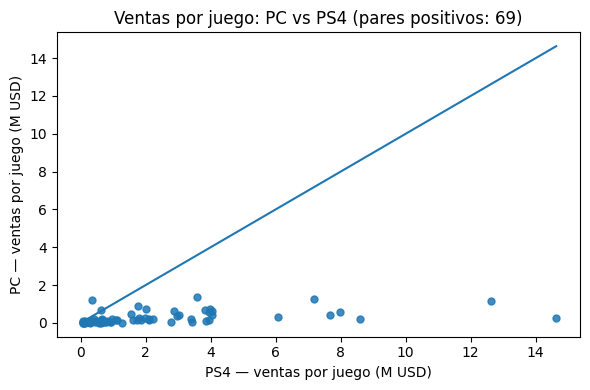


=== PSV vs PS4 — pares positivos: 51 ===
Mediana(PSV-PS4): -0.11 | Media: -0.38 | PSV_wins: 13 | PS4_wins: 36 | ties: 2 | Wilcoxon p=0.0000


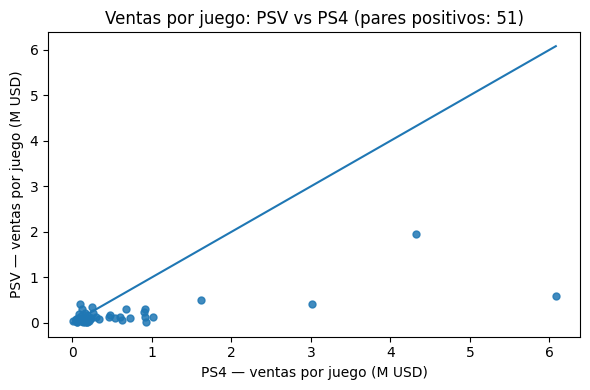


=== XOne vs PS4 — pares positivos: 135 ===
Mediana(XOne-PS4): -0.31 | Media: -0.74 | XOne_wins: 4 | PS4_wins: 130 | ties: 1 | Wilcoxon p=0.0000


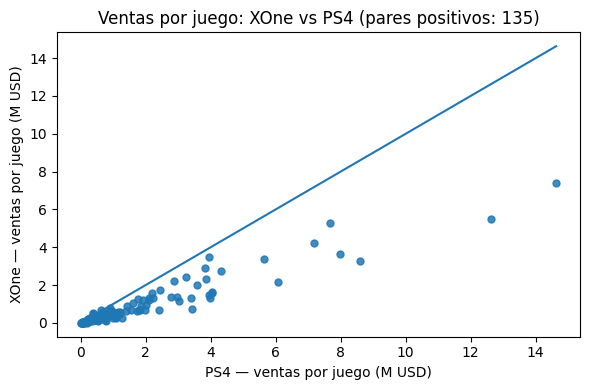

In [23]:
from scipy.stats import wilcoxon

PERIOD_START, PERIOD_END = 2013, 2015
BASE = "PS4"
MIN_PARES = 30  # umbral mínimo de juegos en común con ventas >0 en ambas

# Subset del periodo
cols_sales = ["na_sales","eu_sales","jp_sales","other_sales"]
for c in cols_sales:
    games[c] = pd.to_numeric(games[c], errors="coerce").fillna(0.0)
if "global_sales" not in games.columns:
    games["global_sales"] = games[cols_sales].sum(axis=1)

gsub = (games.dropna(subset=["year_of_release"])
              .query("year_of_release >= @PERIOD_START and year_of_release <= @PERIOD_END")
              .copy())

# Agregar por (name, platform) y pivot
agg = gsub.groupby(["name","platform"], as_index=False)["global_sales"].sum()
pivot = agg.pivot(index="name", columns="platform", values="global_sales")

# f iltra comparadores a la generación de PS4
gen8 = {"PS4","XOne","WiiU","3DS","PSV","PC"}   # puedes ajustar esta lista
candidatos = [p for p in pivot.columns if p != BASE and p in gen8]

# Exige pares con ventas >0 en ambas y un mínimo de pares
def pares_positivos(p):
    pares = pivot[[BASE, p]].dropna()
    pares = pares[(pares[BASE] > 0) & (pares[p] > 0)]
    return pares

comparadores = []
for p in candidatos:
    n = len(pares_positivos(p))
    if n >= MIN_PARES:
        comparadores.append(p)
print("Comparadores elegidos:", comparadores)

# Resumen y gráficos para cada comparador válido
for comp in comparadores:
    pares = pares_positivos(comp)
    dif = pares[comp] - pares[BASE]
    try:
        stat, pval = wilcoxon(dif)
    except ValueError:
        stat, pval = (np.nan, np.nan)

    print(f"\n=== {comp} vs {BASE} — pares positivos: {len(pares)} ===")
    print(f"Mediana({comp}-{BASE}): {dif.median():.2f} | Media: {dif.mean():.2f} | "
          f"{comp}_wins: {(dif>0).sum()} | {BASE}_wins: {(dif<0).sum()} | ties: {(dif==0).sum()} | "
          f"Wilcoxon p={pval:.4f}")

    plt.figure(figsize=(6,4))
    plt.scatter(pares[BASE], pares[comp], s=25, alpha=0.85)
    lim = max(pares[BASE].max(), pares[comp].max())
    plt.plot([0, lim], [0, lim])
    plt.xlabel(f"{BASE} — ventas por juego (M USD)")
    plt.ylabel(f"{comp} — ventas por juego (M USD)")
    plt.title(f"Ventas por juego: {comp} vs {BASE} (pares positivos: {len(pares)})")
    plt.tight_layout()
    plt.show()


,genre,num_games
0,Action,3369
1,Sports,2348
2,Misc,1750
3,Role-Playing,1498
4,Shooter,1323
5,Adventure,1303
6,Racing,1249
7,Platform,888
8,Simulation,873
9,Fighting,849


,genre,num_games,total_sales,mean_sales,median_sales,q1,q3,share_%
0,Action,3369,1744.17,0.52,0.19,0.07,0.49,19.57
10,Sports,2348,1331.27,0.57,0.22,0.09,0.55,14.94
8,Shooter,1323,1052.45,0.80,0.24,0.08,0.73,11.81
7,Role-Playing,1498,934.56,0.62,0.18,0.07,0.52,10.49
4,Platform,888,827.77,0.93,0.27,0.09,0.78,9.29
3,Misc,1750,802.51,0.46,0.16,0.06,0.40,9.00
6,Racing,1249,728.67,0.58,0.19,0.07,0.53,8.18
2,Fighting,849,447.53,0.53,0.21,0.08,0.55,5.02
9,Simulation,873,389.97,0.45,0.15,0.05,0.42,4.38
5,Puzzle,580,242.57,0.42,0.11,0.04,0.30,2.72


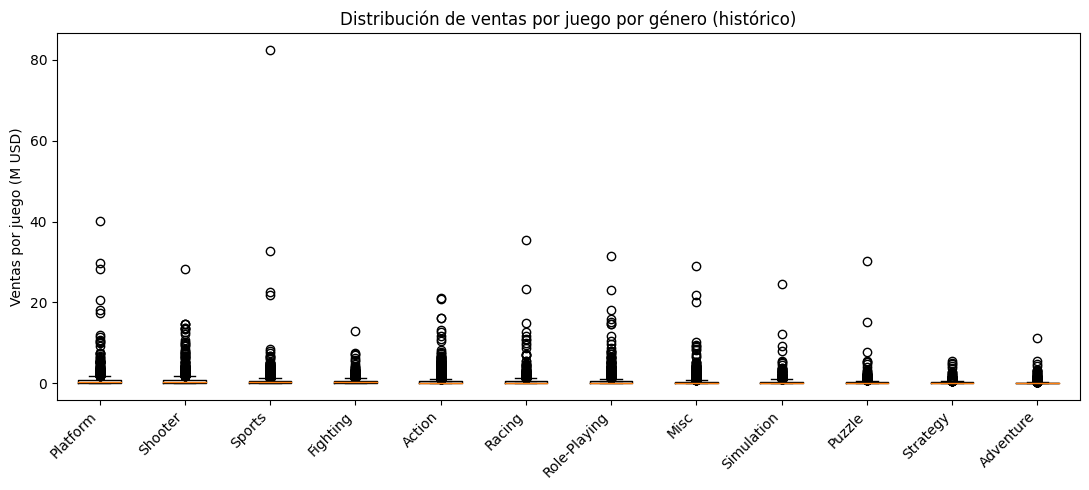

,genre,num_games,total_sales,mean_sales,median_sales,share_%
0,Action,588,291.76,0.50,0.13,30.37
8,Shooter,140,194.76,1.39,0.58,20.27
7,Role-Playing,238,127.71,0.54,0.13,13.29
10,Sports,166,127.16,0.77,0.36,13.24
3,Misc,123,60.22,0.49,0.17,6.27
4,Platform,59,39.40,0.67,0.31,4.10
6,Racing,61,37.10,0.61,0.22,3.86
2,Fighting,64,30.84,0.48,0.13,3.21
9,Simulation,44,19.87,0.45,0.14,2.07
1,Adventure,189,19.82,0.10,0.03,2.06


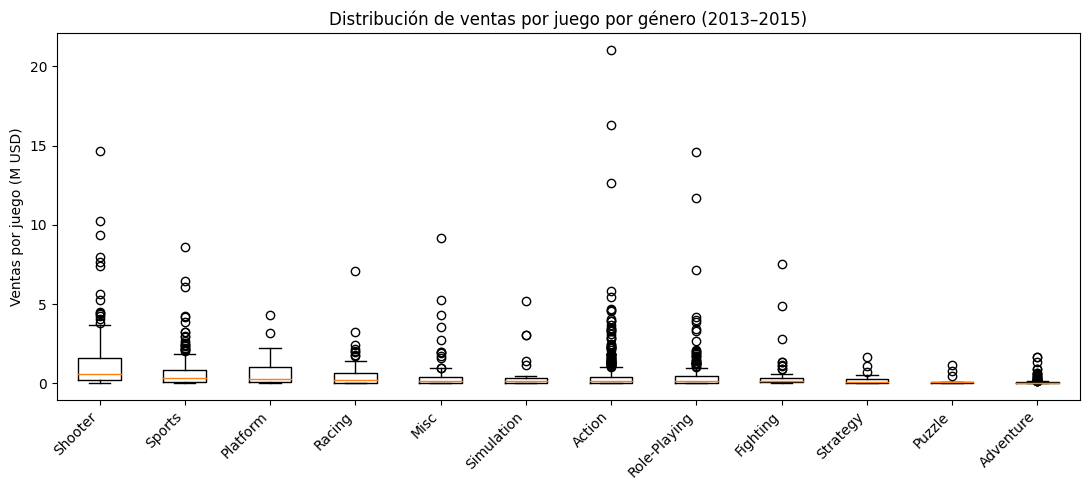

In [24]:
#¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

# HISTÓRICO COMPLETO 
g_all = games.dropna(subset=["genre"]).copy()

dist_genres = (
    g_all["genre"].value_counts()
        .rename_axis("genre").reset_index(name="num_games")
        .sort_values("num_games", ascending=False)
)

summary_all = (
    g_all.groupby("genre")["global_sales"]
         .agg(num_games="count",
              total_sales="sum",
              mean_sales="mean",
              median_sales="median",
              q1=lambda s: s.quantile(0.25),
              q3=lambda s: s.quantile(0.75))
         .reset_index()
         .sort_values("total_sales", ascending=False)
         .round(2)
)
summary_all["share_%"] = (summary_all["total_sales"] /
                          summary_all["total_sales"].sum() * 100).round(2)

display(dist_genres)     # distribución de títulos por género
display(summary_all)     # total, media, mediana por género (histórico)

# Boxplot (histórico) ordenado por mediana
order = summary_all.sort_values("median_sales", ascending=False)["genre"]
import matplotlib.pyplot as plt
plt.figure(figsize=(11,5))
plt.boxplot([g_all.loc[g_all["genre"]==g, "global_sales"].values for g in order],
            labels=order, showfliers=True)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Ventas por juego (M USD)")
plt.title("Distribución de ventas por juego por género (histórico)")
plt.tight_layout(); plt.show()

# PERIODO 2013–2015 (base para 2017)
PERIOD_START, PERIOD_END = 2013, 2015
g_win = (games.dropna(subset=["genre","year_of_release"])
               .query("year_of_release >= @PERIOD_START and year_of_release <= @PERIOD_END")
               .copy())

summary_1315 = (
    g_win.groupby("genre")["global_sales"]
         .agg(num_games="count",
              total_sales="sum",
              mean_sales="mean",
              median_sales="median")
         .reset_index()
         .sort_values("total_sales", ascending=False)
         .round(2)
)
summary_1315["share_%"] = (summary_1315["total_sales"] /
                           summary_1315["total_sales"].sum() * 100).round(2)
display(summary_1315)

plt.figure(figsize=(11,5))
order2 = summary_1315.sort_values("median_sales", ascending=False)["genre"]
plt.boxplot([g_win.loc[g_win["genre"]==g, "global_sales"].values for g in order2],
            labels=order2, showfliers=True)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Ventas por juego (M USD)")
plt.title("Distribución de ventas por juego por género (2013–2015)")
plt.tight_layout(); plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, podemos ver claramente cuales son los géneros preferidos de las personas, las observaciones que haces me parecen buenas también
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
 - Aquí hago las mismas recomendaciones que en el comentario anterior sobre los diagramas de caja
</div>


__Volumen de títulos (histórico):__ Action y Sports son los géneros con más juegos.
Ventas 2013–2015 (base para 2017):

__Por ventas totales (cuota):__
Action ~30%, Shooter ~20%, Role-Playing ~13%, Sports ~13%. (Misc ~6%; resto menor.)

Por juego (típico): las medianas y cajas del boxplot son más altas en Shooter y Sports; también Platform/Racing muestran medianas decentes. Action y RPG tienen mucho volumen pero gran dispersión (mucho título pequeño + algunos éxitos grandes).

__Géneros de ventas bajas:__ Puzzle, Strategy, Adventure, Simulation — medianas muy bajas y colas cortas; rara vez aparecen “blockbusters”.

__*Conclusión*__

Más rentables para 2017 (por probabilidad y escala): Shooter y Sports (medianas altas y muchos outliers), seguidos de Action (gran cuota, aunque muy disperso) y Racing/Platform como apoyo.

Mixtos: Role-Playing (puede tener superventas, pero la mediana es baja; depende mucho de franquicia).

Bajos: Puzzle/Strategy/Adventure/Simulation — buenas opciones de nicho o catálogo, pero no motores de ventas globales.

In [25]:
# Paso 4 — Perfil por región (NA, EU, JP) — 2013–2015 

# Asegurar ventas regionales y globales
sales_cols = ["na_sales","eu_sales","jp_sales","other_sales"]
for c in sales_cols:
    games[c] = pd.to_numeric(games[c], errors="coerce").fillna(0.0)

if "global_sales" not in games.columns:
    games["global_sales"] = games[sales_cols].sum(axis=1)

# Rating ya tiene 'Unrated', nos aseguramos del tipo
games["rating"] = games["rating"].astype("string").fillna("Unrated").astype("category")

# Ventana de trabajo
PERIOD_START, PERIOD_END = 2013, 2015
gwin = (games.dropna(subset=["year_of_release"])
              .query("year_of_release >= @PERIOD_START and year_of_release <= @PERIOD_END")
              .copy())

REGS = {"NA":"na_sales", "EU":"eu_sales", "JP":"jp_sales"}

# Helpers
def top5(df, reg_col, key):
    total = df[reg_col].sum()
    out = (df.groupby(key, as_index=False)
             .agg(total=(reg_col, "sum"))
             .sort_values("total", ascending=False)
             .head(5))
    out["share_%"] = (out["total"] / total * 100).round(2)
    return out

def rating_table(df, reg_col):
    total = df[reg_col].sum()
    out = (df.groupby("rating", as_index=False)
             .agg(total=(reg_col, "sum"),
                  mean_per_game=(reg_col, "mean"),
                  median_per_game=(reg_col, "median"))
             .sort_values("total", ascending=False)
             .round(2))
    out["share_%"] = (out["total"] / total * 100).round(2)
    return out[["rating","total","share_%","mean_per_game","median_per_game"]]

# Top-5 plataformas por región
top_plat = {r: top5(gwin, col, "platform") for r, col in REGS.items()}
display({f"Top-5 plataformas {r} (2013–2015)": t for r, t in top_plat.items()})

# Variación de cuota (%) para la unión de esas plataformas
plat_union = sorted(set().union(*[set(t["platform"]) for t in top_plat.values()]))
region_totals = gwin[["na_sales","eu_sales","jp_sales"]].sum()
shares_plat = (gwin.groupby("platform")[["na_sales","eu_sales","jp_sales"]].sum()
                    .reindex(plat_union).fillna(0))
shares_plat = (shares_plat.div(region_totals, axis=1) * 100).round(2)
shares_plat = shares_plat.rename(columns={"na_sales":"NA_%","eu_sales":"EU_%","jp_sales":"JP_%"}).reset_index()
display(shares_plat)

# Top-5 géneros por región
top_gen  = {r: top5(gwin, col, "genre") for r, col in REGS.items()}
display({f"Top-5 géneros {r} (2013–2015)": t for r, t in top_gen.items()})

# ESRB por región (incluye 'Unrated')
rating_na = rating_table(gwin, "na_sales")
rating_eu = rating_table(gwin, "eu_sales")
rating_jp = rating_table(gwin, "jp_sales")
display({"Rating NA (2013–2015)": rating_na,
         "Rating EU (2013–2015)": rating_eu,
         "Rating JP (2013–2015)": rating_jp})


{'Top-5 plataformas NA (2013–2015)':    platform  total  share_%
 18      PS4  87.25    22.21
 28     X360  80.97    20.61
 30     XOne  78.85    20.07
 17      PS3  62.83    16.00
 2       3DS  34.06     8.67,
 'Top-5 plataformas EU (2013–2015)':    platform   total  share_%
 18      PS4  109.31    32.05
 17      PS3   66.55    19.52
 30     XOne   41.96    12.30
 28     X360   41.81    12.26
 2       3DS   28.63     8.40,
 'Top-5 plataformas JP (2013–2015)':    platform  total  share_%
 2       3DS  59.78    49.21
 17      PS3  22.05    18.15
 20      PSV  15.03    12.37
 18      PS4  10.22     8.41
 27     WiiU  10.21     8.41}

,platform,NA_%,EU_%,JP_%
0,3DS,8.67,8.40,49.21
1,PS3,16.00,19.52,18.15
2,PS4,22.21,32.05,8.41
3,PSV,1.24,1.67,12.37
4,WiiU,6.90,5.39,8.41
5,X360,20.61,12.26,0.42
6,XOne,20.07,12.30,0.27


{'Top-5 géneros NA (2013–2015)':            genre   total  share_%
 0         Action  116.76    29.73
 8        Shooter   93.50    23.80
 10        Sports   57.73    14.70
 7   Role-Playing   40.51    10.31
 3           Misc   26.73     6.81,
 'Top-5 géneros EU (2013–2015)':            genre   total  share_%
 0         Action  107.45    31.51
 8        Shooter   71.96    21.10
 10        Sports   48.51    14.23
 7   Role-Playing   32.69     9.59
 3           Misc   19.38     5.68,
 'Top-5 géneros JP (2013–2015)':           genre  total  share_%
 7  Role-Playing  44.43    36.58
 0        Action  33.42    27.51
 3          Misc   8.16     6.72
 2      Fighting   6.90     5.68
 8       Shooter   5.55     4.57}

{'Rating NA (2013–2015)':     rating   total  share_%  mean_per_game  median_per_game
 5        M  149.54    38.07           0.51             0.18
 8  Unrated   80.89    20.59           0.11             0.00
 1        E   71.08    18.10           0.30             0.08
 2     E10+   50.43    12.84           0.25             0.16
 7        T   40.84    10.40           0.17             0.05
 0       AO    0.00     0.00            NaN              NaN
 3       EC    0.00     0.00            NaN              NaN
 4      K-A    0.00     0.00            NaN              NaN
 6       RP    0.00     0.00            NaN              NaN,
 'Rating EU (2013–2015)':     rating   total  share_%  mean_per_game  median_per_game
 5        M  128.78    37.76           0.44             0.15
 8  Unrated   71.44    20.95           0.09             0.00
 1        E   69.75    20.45           0.30             0.08
 2     E10+   38.88    11.40           0.19             0.12
 7        T   32.16     9.43      

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

En los últimos tres ejercicios recomiendo acompañar las tablas con gráficas que resalten las diferencias/similitudes de las regiones
</div>


__*Variaciones clave entre regiones*__

__Plataformas:__ Xbox fuerte en NA, medio en EU, casi nula en JP. PS4 lidera NA/EU; 3DS/PSV pesan mucho más en JP.

__Géneros:__ Shooter/Sports empujan NA/EU; RPG/Action dominan JP.

__ESRB:__ útil en NA/EU para segmentar (M y T concentran ventas). Poco útil en JP por “Unrated”.

__*Implicaciones para 2017*__

NA/EU: priorizar lanzamientos en PS4 (y XOne en NA), con foco en Shooter/Sports/Action; usar ESRB (M/T) para targeting.

JP: priorizar 3DS/PS4/PSV con RPG/Action y no basarse en ESRB para segmentación (considerar sistema CERO local).

__Hipótesis 1__

*Planteamiento:* “Las calificaciones promedio de los usuarios para Xbox One (XOne) y PC son las mismas”.

*Formulación*
H0 (nula): μ_{XOne} = μ_{PC} (las medias de user_score son iguales).
H1 (alternativa): μ_{XOne} ≠ μ_{PC} (diferentes).
α: 0.05.

*Criterio de prueba y por qué*
Se usará  t de Welch (dos muestras, dos colas, varianzas desiguales): user_score es continuo (0–10), las muestras son independientes y los tamaños suelen ser grandes; por CLT la t es robusta, y Welch no asume varianzas iguales.

Como sensibilidad, Se reporta también Mann–Whitney U (no paramétrica) por si la distribución es muy no-normal.

Se añade tamaño del efecto (Hedges g).

In [26]:
# XOne vs PC en user_score (2013–2015)
from scipy.stats import ttest_ind, mannwhitneyu

ALPHA = 0.05
PERIOD_START, PERIOD_END = 2013, 2015

# Subconjunto coherente con el estudio
gwin = (games.dropna(subset=["year_of_release"])
              .query("year_of_release >= @PERIOD_START and year_of_release <= @PERIOD_END"))

# Asegurar numérico y quitar NaN de user_score
gwin["user_score"] = pd.to_numeric(gwin["user_score"], errors="coerce")

xone = gwin.loc[gwin["platform"]=="XOne", "user_score"].dropna().to_numpy()
pc   = gwin.loc[gwin["platform"]=="PC",   "user_score"].dropna().to_numpy()

# Descriptivos
def desc(a): 
    return {"n": len(a), "mean": np.nanmean(a), "std": np.nanstd(a, ddof=1)}
print("Descriptivos XOne:", desc(xone))
print("Descriptivos PC  :", desc(pc))

# t de Welch (dos colas)
t_stat, p_t = ttest_ind(xone, pc, equal_var=False, alternative="two-sided")
print(f"\nWelch t-test: t={t_stat:.3f}, p={p_t:.4f}")

# Mann–Whitney U (sensibilidad)
u_stat, p_u = mannwhitneyu(xone, pc, alternative="two-sided")
print(f"Mann–Whitney U: U={u_stat:.0f}, p={p_u:.4f}")

# Tamaño del efecto (Hedges g)
n1, n2 = len(xone), len(pc)
s1, s2 = np.std(xone, ddof=1), np.std(pc, ddof=1)
sp = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))  # pooled SD
d = (np.mean(xone) - np.mean(pc)) / sp                   # Cohen's d
J = 1 - 3/(4*(n1+n2)-9)                                  # corrección de Hedges
g = J * d
print(f"Hedges g (XOne - PC): {g:.3f}")

# Decisión (con α=0.05)
if p_t < ALPHA:
    print("\nConclusión (t de Welch): Rechazamos H0 — las medias de user_score difieren entre XOne y PC.")
else:
    print("\nConclusión (t de Welch): No rechazamos H0 — no hay evidencia suficiente de diferencia de medias.")


Descriptivos XOne: {'n': 116, 'mean': 6.477586206896552, 'std': 1.2882132018316355}
Descriptivos PC  : {'n': 110, 'mean': 6.258181818181818, 'std': 1.7511926116133374}

Welch t-test: t=1.068, p=0.2867
Mann–Whitney U: U=6489, p=0.8252
Hedges g (XOne - PC): 0.143

Conclusión (t de Welch): No rechazamos H0 — no hay evidencia suficiente de diferencia de medias.


__Hipótesis 2__

Planteamiento: “Las calificaciones promedio de los usuarios para los géneros Action y Sports son diferentes”.

Formulación
H0 (nula): μ_{Action} = μ_{Sports}
H1 (alternativa): μ_{Action} ≠ μ_{Sports} (dos colas)
α: 0.05

Criterio de prueba
t de Welch (dos muestras, dos colas): continuo, muestras independientes y posible varianza desigual.
Mann–Whitney U como contraste no paramétrico de sensibilidad.
Se reporta el tamaño del efecto (Hedges g).

In [27]:
# Action vs Sports en user_score (2013–2015)
from scipy.stats import ttest_ind, mannwhitneyu

ALPHA = 0.05
PERIOD_START, PERIOD_END = 2013, 2015

gwin = (games.dropna(subset=["year_of_release"])
              .query("year_of_release >= @PERIOD_START and year_of_release <= @PERIOD_END")
              .copy())

# user_score numérico y sin NaN
gwin["user_score"] = pd.to_numeric(gwin["user_score"], errors="coerce")

act = gwin.loc[gwin["genre"]=="Action",  "user_score"].dropna().to_numpy()
spo = gwin.loc[gwin["genre"]=="Sports",  "user_score"].dropna().to_numpy()

# Descriptivos
def desc(a): 
    return {"n": len(a), "mean": float(np.nanmean(a)), "std": float(np.nanstd(a, ddof=1))}
print("Descriptivos Action:", desc(act))
print("Descriptivos Sports:", desc(spo))

# t de Welch (dos colas)
t_stat, p_t = ttest_ind(act, spo, equal_var=False, alternative="two-sided")
print(f"\nWelch t-test: t={t_stat:.3f}, p={p_t:.4f}")

# Mann–Whitney (sensibilidad)
u_stat, p_u = mannwhitneyu(act, spo, alternative="two-sided")
print(f"Mann–Whitney U: U={u_stat:.0f}, p={p_u:.4f}")

# Tamaño del efecto (Hedges g) -> (Action - Sports)
n1, n2 = len(act), len(spo)
s1, s2 = np.std(act, ddof=1), np.std(spo, ddof=1)
sp = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))  # pooled SD
d = (np.mean(act) - np.mean(spo)) / sp                   # Cohen's d
J = 1 - 3/(4*(n1+n2)-9)                                  # corrección de Hedges
g_eff = J * d
print(f"Hedges g (Action - Sports): {g_eff:.3f}")

# Decisión (α=0.05)
if p_t < ALPHA:
    print("\nConclusión (t de Welch): Rechazamos H0 — las medias de user_score difieren entre Action y Sports.")
else:
    print("\nConclusión (t de Welch): No rechazamos H0 — no hay evidencia suficiente de diferencia de medias.")

print("Nota: user_score tiene >50% de faltantes; el test se hace con los juegos que sí tienen puntaje.")


Descriptivos Action: {'n': 304, 'mean': 6.8930921052631575, 'std': 1.2847615302103441}
Descriptivos Sports: {'n': 123, 'mean': 5.179674796747967, 'std': 1.7034179405716108}

Welch t-test: t=10.058, p=0.0000
Mann–Whitney U: U=29668, p=0.0000
Hedges g (Action - Sports): 1.206

Conclusión (t de Welch): Rechazamos H0 — las medias de user_score difieren entre Action y Sports.
Nota: user_score tiene >50% de faltantes; el test se hace con los juegos que sí tienen puntaje.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto en ambos casos, bien hecho!
</div>


## Conclusión general del proyecto

### 1)  Preparación y calidad de datos

Se estandarizarón nombres a minúsculas, se convirtieron tipos (años a Int64, ventas a float, etiquetas a category).

__Tratamiento de ausentes:__
* name: se eliminaron 2 filas (sin nombre no hay identificación).
* user_score: Se convirtieron los TBD a NaN y se dejó sin imputar; >50% de faltantes, imputar media/mediana sesgaría el análisis.
* critic_score: también >50% faltantes; se dejó como NaN.
* rating: Se completó con “Unrated” (ESRB no aplica en muchos casos, p. ej. JP).
* Se creó global_sales como suma de ventas regionales.

### 2) Panorama temporal y ventana de trabajo

El número de lanzamientos crece hasta mediados de los 2000, con declive después. 2016 está incompleto.

Ciclo de plataformas (Top-10 históricas): vida típica ≈ 10 años, con rampa ~3–5 años y declive ~5–6 años.

Para planificar 2017 tomamos 2013–2015: suficiente volumen, generación vigente (PS4/XOne/3DS/PC) y sin el sesgo de 2016.

### 3) Plataformas y dinámica

2013–2015:

__NA:__ PS4 (22%), X360 (21%), XOne (20%), PS3 (16%), 3DS (9%).

__EU:__ PS4 (32%) domina; PS3 (20%), XOne (12%), X360 (12%), 3DS (8%).

__JP:__ 3DS (49%), PS3 (18%), PSV (12%), PS4 (8%), WiiU (8%). Xbox marginal.

Tendencia: PS4/XOne en crecimiento, PS3/X360 en declive.
Plataformas potencialmente rentables para 2017: PS4 (global), XOne (sobre todo NA) y 3DS/PS4 en JP; PC como complemento.

### 4) Distribución de ventas por plataforma (boxplots)

Las ventas por juego son muy asimétricas: muchas entradas con ventas bajas y pocos hits que elevan el promedio (media >> mediana).

Diferencias entre plataformas visibles en la mediana y en la dispersión  PS4/XOne muestran colas largas por blockbusters).

### 5) Reseñas y ventas (PS4 como caso)

Correlación con critic_score: positiva moderada (~0.4–0.5). Mejores notas profesionales, mayores ventas.

Correlación con user_score: casi nula; no predice bien la demanda inicial.

Conclusión: para previsión y marketing, priorizar señal de crítica (o expectativas de crítica). user_score es útil post-lanzamiento (reputación/comunidad).

### 6) Comparación del mismo juego entre plataformas

Comparaciones pareadas (2013–2015, ventas >0 en ambas):

PS4 vs XOne: PS4 vende más por juego en la mayoría de pares.

PS4 vs PC: resultado mixto, con ligera ventaja global de PS4; depende del género.

Implicación: al competir en multiplataforma, PS4 suele ofrecer mejor rendimiento unitario.

### 7) Géneros

Totales y cuota (2013–2015): Action, Shooter, Role-Playing, Sports concentran la mayor parte.

Rentabilidad por juego (mediana):

Altas: Shooter y Sports; también Racing/Platform aceptables.

Mixtas: Action y RPG (gran dispersión: muchos títulos pequeños y algunos súper éxitos).

Bajas: Puzzle/Strategy/Adventure/Simulation.

Recomendación: para volumen y probabilidad de buen desempeño, Shooter/Sports y Action; RPG selectivo según franquicia.

### 8) Perfil regional

NA/EU: más PS4/XOne; géneros fuertes Shooter, Action, Sports.
ESRB informativa: ventas concentradas en M y T.

JP: dominan 3DS/PS4/PSV; géneros RPG y Action.
Unrated es alto → ESRB no explica bien JP.

### 9) Pruebas de hipótesis (2013–2015, α=0.05)

H1 (XOne vs PC, user_score): No se rechaza H0. Medias similares (XOne≈6.48, PC≈6.26). Tamaño del efecto pequeño (g≈0.14).

H2 (Action vs Sports, user_score): Se rechaza H0. Diferencias claras (Action≈6.89 > Sports≈5.18), efecto grande (g≈1.21).

### 10) Recomendaciones para 2017

Plataformas objetivo:

Global/EU: PS4.

NA: PS4 + XOne.

JP: 3DS/PS4/PSV.

Géneros: prioriza Shooter/Sports/Action (y RPG en JP o con IP fuerte).

Marketing y timing: invierte en cobertura de crítica (press previews, demos) y alinea ventanas de lanzamiento en el pico de vida de cada plataforma.

Modelado: incluir plataforma, año, género, región, y critic_score/expectativas; usar métricas robustas (log-ventas, mediana) por la asimetría.

### 11) Limitaciones

user_score y critic_score con >50% de ausentes → análisis de reseñas sobre subconjunto disponible.

2016 parcialmente incompleto; por eso se usó 2013–2015.


#### Resumen ejecutivo:
Para 2017, el foco comercial debería estar en PS4 (y XOne en NA), con campañas fuertes en Shooter/Sports/Action, apoyándose en reseñas de críticos como señal de demanda. En Japón, priorizar RPG/Action en 3DS/PS4/PSV y segmentar por sistema local (CERO), no por ESRB.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado y limpio
    
</div>
